# 데이터셋 다운로드

타이타닉 데이터셋: https://www.kaggle.com/heptapod/titanic

In [ ]:
!kaggle datasets download -d kandij/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/kandij/diabetes-dataset
License(s): unknown
  0% 0.00/8.92k [00:00<?, ?B/s]
100% 8.92k/8.92k [00:00<00:00, 11.1MB/s]


In [ ]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
  inflating: diabetes2.csv           


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드

In [ ]:
df = pd.read_csv('/content/diabetes2.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# 사용하는 칼럼만 추출

In [ ]:
# df = pd.read_csv('train_and_test2.csv', usecols=[
#   'Age', # 나이
#   'Fare', # 승차 요금
#   'Sex', # 성별
#   'sibsp', # 타이타닉에 탑승한 형제자매, 배우자의 수
#   'Parch', # 타이타니게 탑승한 부모, 자식의 수
#   'Pclass', # 티켓 등급 (1, 2, 3등석)
#   'Embarked', # 탑승국
#   '2urvived' # 생존 여부 (0: 사망, 1: 생존)
# ])

# df.head(5)

# 간단하게 데이터셋 미리보기

연령에 따른 비만자 수

<Axes: xlabel='Age', ylabel='count'>

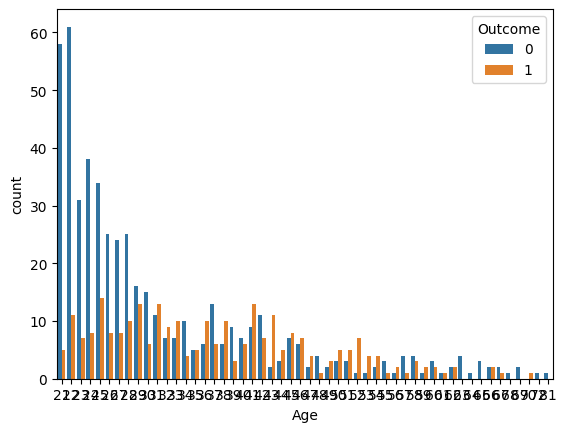

In [ ]:
sns.countplot(x='Age', hue='Outcome', data=df)

# 생존여부 클래스의 개수 확인

<Axes: xlabel='2urvived', ylabel='count'>

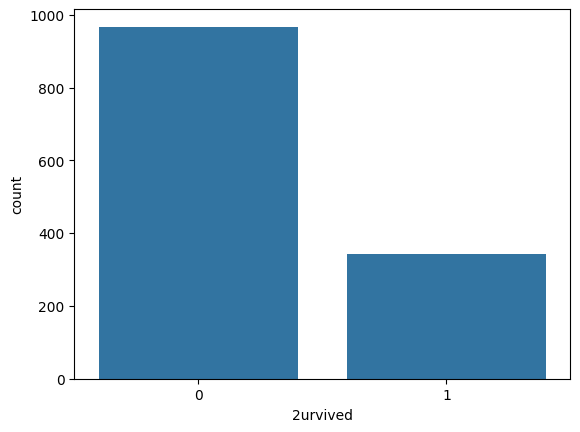

In [ ]:
sns.countplot(x=df['2urvived'])

# 전처리 (Preprocessing)

## 비어있는 행 확인

1. 비어있는 값(null 또는 na)이 있는지 확인하고,
2. 비어있는 값을 포함한 행을 제거한다

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# print(len(df))

# df = df.dropna()

# print(len(df))

1309
1307


## X, y 데이터 분할

In [ ]:
x_data = df.drop(columns=['Outcome'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [ ]:
y_data = df[['Outcome']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


## 표준화 (Standardization)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

z = (x - u) / s

z = (x - 평균) / 표준편차

In [ ]:
## sklearn 모듈에 StandardScaler() 라는 함수를 활용하여 표준화를 진행
scaler = StandardScaler()  ### normalization을 활용할 때는 MinMaxScaler()를 이용
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[ 0.6399473   0.8483238   0.14964075  0.90726995 -0.6928905   0.20401257
  0.46849188  1.4259955 ]


# 학습/검증 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


# 모델 학습

In [ ]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['acc'])  ## 손실함수는 'binary_crossentropy', 분류문제에 있어서는 metrics 은  'acc'를 자주 사용(0~1 값을 가짐)

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
20/20 [==============================] - 1s 12ms/step - loss: 29.9386 - acc: 0.5098 - val_loss: 40.2211 - val_acc: 0.6299
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 33.0212 - acc: 0.5440 - val_loss: 76.5020 - val_acc: 0.6299
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 30.9809 - acc: 0.5521 - val_loss: 46.4029 - val_acc: 0.6299
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 27.1384 - acc: 0.5619 - val_loss: 17.3825 - val_acc: 0.6234
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 27.7248 - acc: 0.5765 - val_loss: 21.2496 - val_acc: 0.4091
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 26.5723 - acc: 0.5619 - val_loss: 36.6858 - val_acc: 0.6299
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 31.6353 - acc: 0.5472 - val_loss: 20.7824 - val_acc: 0.5065
Epoch 8/20
20/20 [==============================] - 0s 3ms/step - loss: 25.